In [1]:
#Set up required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import openpyxl 

In [2]:
#Importing Data and display first 10 rows
electricity_df=pd.read_excel ('Junior Data Analyst _ Data.xlsx',
                              engine='openpyxl',
                              sheet_name='Raw Data',
                              skiprows=range(2))
electricity_df.head(10)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000
6,6,2020-01-01 06:00:00,0.006,0.648000
7,7,2020-01-01 07:00:00,0.009,0.774000
8,8,2020-01-01 08:00:00,0.012,1.299000
9,9,2020-01-01 09:00:00,0.846,0.606000


In [3]:
#Step 3: Learning more about the dataset
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [4]:
#Look for empty rows
electricity_df.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000
8759,23,2020-12-31 23:00:00,0.000,0.805919


In [5]:
#Step(i): Data Visualization and Checks
#Since there is no empty row, I can drop empty rows by using this if availabe
electricity_df.dropna(axis=0, inplace=True)

In [6]:
#Checking shape of the data to make sure all data is available 
electricity_df.shape

(8760, 4)

In [7]:
#Check columns for the data
electricity_df.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

In [8]:
#I would change the headers to make it more convient since there is a lot of spaces btwn the titles.
electricity_df.rename (columns = {'Hour':'hour',
                                  'Date/hour start':'date_hour_start',
                                  'Solar electricity generation (kWh)':'solar_kwh',
                                  'Electricity usage (kWh)':'electric_use_kWh'}, inplace = True)
electricity_df.head()

,hour,date_hour_start,solar_kwh,electric_use_kWh
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [9]:
#Performing some descritive analysis
electricity_df.describe()

,hour,solar_kwh,electric_use_kWh
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.312704
std,6.922582,2.026098,491.479806
min,0.000000,0.000000,-12.624000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,46000.000000


In [10]:
#We will visualize some data in order to have a good picture of what data we are dealing with.
#In this we will use the average electricity usage and the average solar electricity generated
Sol_vs_elec = electricity_df.groupby('hour').mean()

<AxesSubplot:xlabel='hour'>

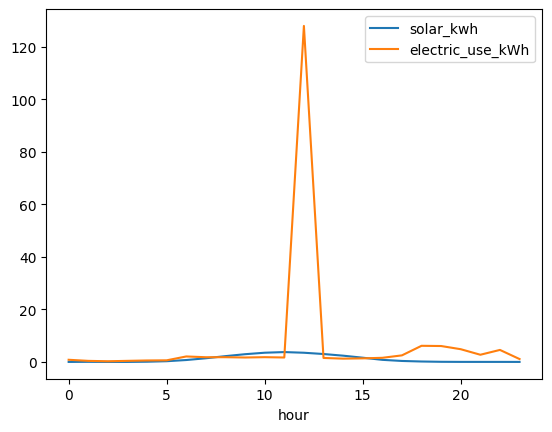

In [11]:
Sol_vs_elec.plot(kind='line')

In [12]:
#This returns two DataFrames: one with the indices of the maximum values for each column and another with the maximum values for each column in the sol_vs_elec DataFrame.
Sol_vs_elec.idxmax().to_frame(), Sol_vs_elec.max().to_frame()

(                   0
 solar_kwh         11
 electric_use_kWh  12,
                            0
 solar_kwh           3.751915
 electric_use_kWh  128.000444)

<AxesSubplot:xlabel='electric_use_kWh'>

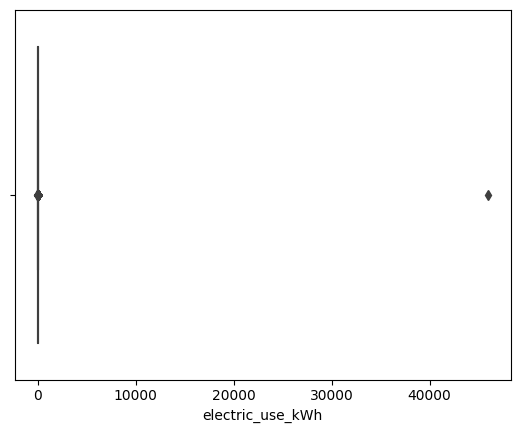

In [13]:
#checking outliers for Electric use
sns.boxplot(x='electric_use_kWh', data=electricity_df)

<AxesSubplot:xlabel='solar_kwh'>

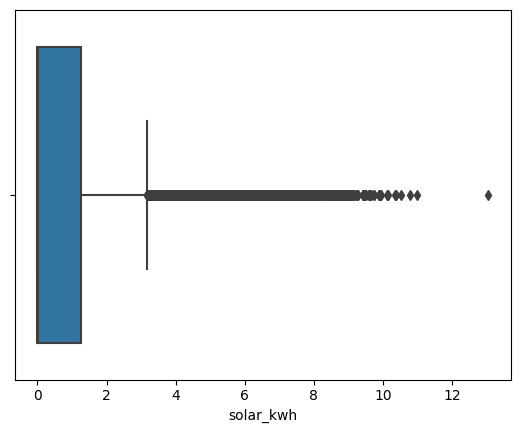

In [14]:
#checking outliers for solar gen
sns.boxplot(x='solar_kwh', data=electricity_df)

In [72]:
#Correcting the electric in use outliers
df = electricity_df
elec_median=df['electric_use_kWh'].median()
df["electric_use_kWh"]=np.where(df["electric_use_kWh"]==df["electric_use_kWh"].max(), elec_median,df['electric_use_kWh'])

<AxesSubplot:xlabel='electric_use_kWh'>

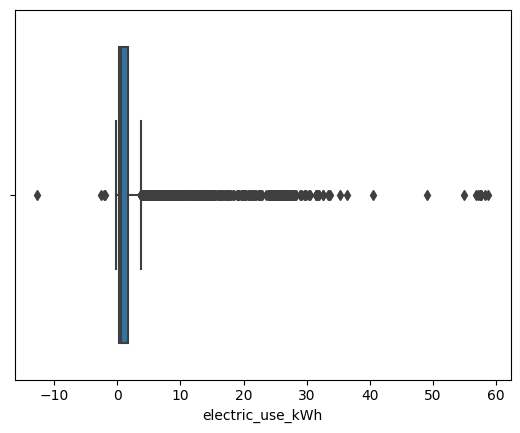

In [73]:
#checking outliers for Electric use again
sns.boxplot(x='electric_use_kWh', data=electricity_df)

In [74]:
df['electric_use_kWh'].mean()

2.0479955893607307

<AxesSubplot:xlabel='hour'>

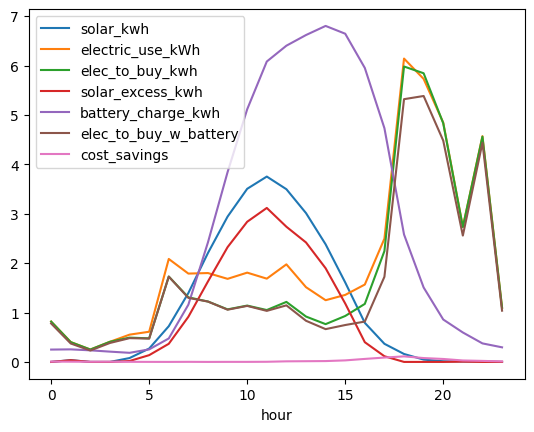

In [75]:
Sol_vs_elec = electricity_df.groupby('hour').mean()
Sol_vs_elec.plot(kind='line')

In [76]:
Sol_vs_elec.idxmax().to_frame(), Sol_vs_elec.max().to_frame()

(                        0
 solar_kwh              11
 electric_use_kWh       18
 elec_to_buy_kwh        18
 solar_excess_kwh       11
 battery_charge_kwh     14
 elec_to_buy_w_battery  19
 cost_savings           18,
                               0
 solar_kwh              3.751915
 electric_use_kWh       6.140079
 elec_to_buy_kwh        5.979427
 solar_excess_kwh       3.116679
 battery_charge_kwh     6.801118
 elec_to_buy_w_battery  5.382835
 cost_savings           0.112362)

In [36]:
#Step(ii):Calculating Electricity Bought

df['elec_to_buy_kwh']= df['electric_use_kWh']-df['solar_kwh']
df.loc[df['elec_to_buy_kwh'] <0, 'elec_to_buy_kwh']=0

In [37]:
df.head(10)

,hour,date_hour_start,solar_kwh,electric_use_kWh,elec_to_buy_kwh,solar_excess_kwh
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.00
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.00
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.00
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.00
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.00
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.00
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.00
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.00
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.00
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.24


In [38]:
df['elec_to_buy_kwh'].min(), df['elec_to_buy_kwh'].max()

(0.0, 59.59260000000001)

In [39]:
#Step(iii): Calculating Excess Solar Generation

df['solar_excess_kwh']= df['solar_kwh']-df['electric_use_kWh']
df.loc[df['solar_excess_kwh'] <0, 'solar_excess_kwh']=0

In [40]:
df.head(15)

,hour,date_hour_start,solar_kwh,electric_use_kWh,elec_to_buy_kwh,solar_excess_kwh
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240


In [41]:
df['solar_excess_kwh'].min(), df['solar_excess_kwh'].max()

(0.0, 12.734031600000002)

In [48]:
#Step(iv): Modeling Battery Charge Level

battery_charge = [0]
for i in range (1, len(df)):
    value = battery_charge [-1] + df.loc[i, 'solar_excess_kwh']-df.loc[i, 'electric_use_kWh']
    value=max(0, min(value, 12.5))
    battery_charge.append(value)

df['battery_charge_kwh']= battery_charge

In [49]:
min(battery_charge), max(battery_charge) 

(0, 12.5)

In [52]:
df.head(30)

,hour,date_hour_start,solar_kwh,electric_use_kWh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.0000
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.0000
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.0000
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.0000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.0000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000,0.0000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.0000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.0000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.0000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.0000


In [55]:
#Step(v): Calculating Electricity Bought with Battery

df['elec_to_buy_w_battery'] = df['elec_to_buy_kwh']-df['battery_charge_kwh']
df.loc[df['elec_to_buy_w_battery']<0,'elec_to_buy_w_battery'] = 0

In [57]:
df.head(30)

,hour,date_hour_start,solar_kwh,electric_use_kWh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh,elec_to_buy_w_battery
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.0000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.0000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.0000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.0000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.0000,0.960000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000,0.0000,0.885000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.0000,0.642000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.0000,0.765000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.0000,1.287000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.0000,0.000000


In [58]:
#Step(vi): Calculating Savings from Installing a Battery

df['cost_savings']=0.17*df['elec_to_buy_kwh']-0.17*df['elec_to_buy_w_battery']

In [60]:
df.head(20)

,hour,date_hour_start,solar_kwh,electric_use_kWh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh,elec_to_buy_w_battery,cost_savings
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.0000,1.509849,0.000000
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.0000,1.411859,0.000000
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.0000,1.023898,0.000000
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.0000,0.642000,0.000000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.0000,0.960000,0.000000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000,0.0000,0.885000,0.000000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.0000,0.642000,0.000000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.0000,0.765000,0.000000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.0000,1.287000,0.000000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.0000,0.000000,0.000000


In [62]:
df[['cost_savings']].describe()

,cost_savings
count,8760.000000
mean,0.023467
std,0.094127
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.006230


In [64]:
#Step (vii): Data Aggregation and Visualization

df['month'] = df['date_hour_start'].dt.strftime('%B')
df.head(20)

,hour,date_hour_start,solar_kwh,electric_use_kWh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh,elec_to_buy_w_battery,cost_savings,month
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.0000,1.509849,0.000000,January
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.0000,1.411859,0.000000,January
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.0000,1.023898,0.000000,January
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.0000,0.642000,0.000000,January
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.0000,0.960000,0.000000,January
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000,0.0000,0.885000,0.000000,January
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.0000,0.642000,0.000000,January
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.0000,0.765000,0.000000,January
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.0000,1.287000,0.000000,January
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.0000,0.000000,0.000000,January


In [65]:
#grouping the data
df_monthly = df.groupby('month').sum()
df_monthly

,hour,solar_kwh,electric_use_kWh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh,elec_to_buy_w_battery,cost_savings
month,,,,,,,,
April,8280,915.132,1726.356487,1460.504519,649.280032,1808.722680,1366.067677,16.054263
August,8556,1158.639,1491.525351,1217.886351,885.000000,2928.178924,1061.982898,26.503587
December,8556,205.965,1900.081595,1792.036595,97.920000,370.554000,1760.776595,5.314200
February,7728,449.634,1557.578810,1392.808310,284.863500,954.458573,1337.212110,9.451354
January,8556,266.259,1705.801181,1599.601181,160.059000,507.521600,1568.893181,5.220360
July,8556,1371.465,1196.957121,907.445121,1081.953000,3295.602656,757.601675,25.473386
June,8280,1408.287,1158.995538,844.784538,1094.076000,3348.979991,689.306770,26.431221
March,8556,602.451,1797.859450,1619.011450,423.603000,1348.463600,1544.131850,12.729532
May,8556,1641.360,943.803809,717.333809,1414.890000,4205.310081,532.806345,31.369669


In [66]:
new_order = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_monthly2 = df_monthly.reindex(new_order, axis=0)
df_monthly2

,hour,solar_kwh,electric_use_kWh,elec_to_buy_kwh,solar_excess_kwh,battery_charge_kwh,elec_to_buy_w_battery,cost_savings
month,,,,,,,,
January,8556,266.259,1705.801181,1599.601181,160.059000,507.521600,1568.893181,5.220360
February,7728,449.634,1557.578810,1392.808310,284.863500,954.458573,1337.212110,9.451354
March,8556,602.451,1797.859450,1619.011450,423.603000,1348.463600,1544.131850,12.729532
April,8280,915.132,1726.356487,1460.504519,649.280032,1808.722680,1366.067677,16.054263
May,8556,1641.360,943.803809,717.333809,1414.890000,4205.310081,532.806345,31.369669
June,8280,1408.287,1158.995538,844.784538,1094.076000,3348.979991,689.306770,26.431221
July,8556,1371.465,1196.957121,907.445121,1081.953000,3295.602656,757.601675,25.473386
August,8556,1158.639,1491.525351,1217.886351,885.000000,2928.178924,1061.982898,26.503587
September,8280,835.680,1620.714165,1398.834165,613.800000,1976.154437,1288.260760,18.797479


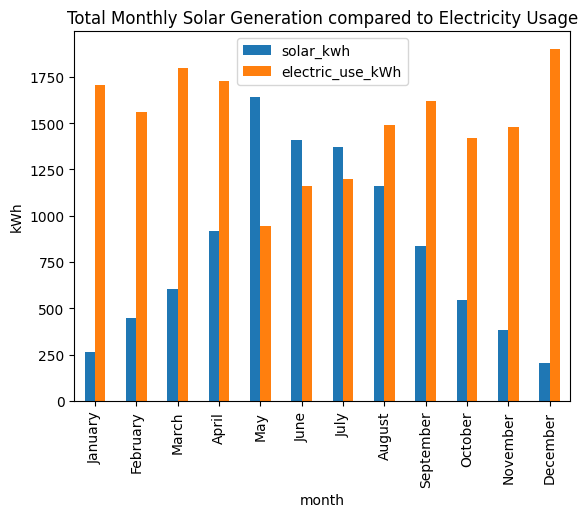

In [68]:
df_monthly2[['solar_kwh','electric_use_kWh']].plot(kind='bar')

plt.title("Total Monthly Solar Generation compared to Electricity Usage")
plt.ylabel('kWh')

plt.show()

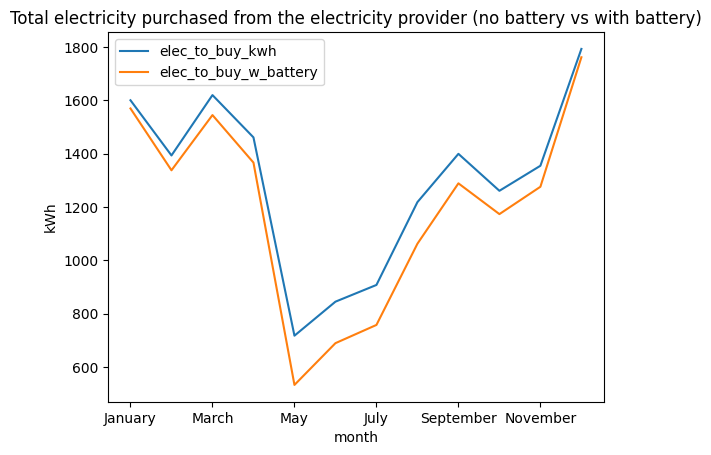

In [71]:
df_monthly2[['elec_to_buy_kwh','elec_to_buy_w_battery']].plot(kind='line')

plt.title("Total electricity purchased from the electricity provider (no battery vs with battery)")
plt.ylabel('kWh')

plt.show()